In [16]:
from PIL import Image
import pytesseract

In [18]:
pytesseract.pytesseract.tesseract_cmd=r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

# Simple example how to get text from image

In [26]:
image = Image.open('../example1.png')

In [31]:
text = pytesseract.image_to_string(image)

In [149]:
print(text)


   private HttpHeaders  withoutTokenHeaders = new HttpHeaders(); 

   @Before 
   public void  login() { 
       ResponseEntity<AuthUserLoginResponseDTO>  responseEntity =  restTemplate.postForEntity("/auth/login”, 
               new  AuthUserLoginDTO(ADMIN_EMAIL, ADMIN_PASS), AuthUserLoginResponseDTO.class) 5 

       String  accessToken =  “Bearer " + responseEntity.getBody().getAccessToken(); 

       headers = new HttpHeaders(); 
       headers.add("Authorization", accessToken) ; 

        headers . setContentType(MediaType.APPLICATION_JSON) ; 
        headers.add("Content-Type",   “application/json") ; 



# Example with custom config

In [14]:
from PIL import Image
import pytesseract
from pytesseract import Output
import pandas as pd
pytesseract.pytesseract.tesseract_cmd=r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"


In [15]:
custom_config = r'-c preserve_interword_spaces=1 --oem 1 --psm 4'

In [16]:
image = Image.open('../example1.png')

In [17]:
text = pytesseract.image_to_string(image, config=custom_config)
print(text)

private HttpHeaders withoutTokenHeaders = new HttpHeaders();

@Before
public void login() {
ResponseEntity<AuthUserLoginResponseDTO> responseEntity = restTemplate.postForEntity("/auth/login”,
new AuthUserLoginDTO(ADMIN_EMAIL, ADMIN_PASS), AuthUserLoginResponseDTO.class) 5

 

String accessToken = “Bearer " + responseEntity.getBody().getAccessToken();

headers = new HttpHeaders();
headers.add("Authorization", accessToken) ;

 

headers . setContentType(MediaType.APPLICATION_JSON) ;
headers.add("Content-Type", “application/json") ;

                                                                                                                                                                                                                                                                  



# Example with identation and custom config

### Function which makes text indentation. Returns idented text

In [18]:
def get_text_with_indentation(image, config):
    d = pytesseract.image_to_data(image, config=config, output_type=Output.DICT)
    df = pd.DataFrame(d)

    final_text = ''

    # clean up blanks
    df1 = df[(df.conf!='-1')&(df.text!=' ')&(df.text!='')]
    # sort blocks vertically
    sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
    for block in sorted_blocks:
        curr = df1[df1['block_num']==block]
        sel = curr[curr.text.str.len()>3]
        char_w = (sel.width/sel.text.str.len()).mean()
        prev_par, prev_line, prev_left = 0, 0, 0
        text = ''
        for ix, ln in curr.iterrows():
            # add new line when necessary
            if prev_par != ln['par_num']:
                text += '\n'
                prev_par = ln['par_num']
                prev_line = ln['line_num']
                prev_left = 0
            elif prev_line != ln['line_num']:
                text += '\n'
                prev_line = ln['line_num']
                prev_left = 0

            added = 0  # num of spaces that should be added
            if ln['left']/char_w > prev_left + 1:
                added = int((ln['left'])/char_w) - prev_left
                text += ' ' * added 
            text += ln['text'] + ' '
            prev_left += len(ln['text']) + added + 1
        text += '\n'
        final_text += text

    return final_text

### Pass image and config to get_text_with_indentation function

In [13]:
image = Image.open('../example1.png')
custom_config = r'-c preserve_interword_spaces=1 --oem 1 --psm 4'
text = get_text_with_indentation(image, custom_config)
print(text)

NameError: name 'Image' is not defined

## Example with preprocessing image and then using tesseract

In [4]:
import numpy as np
import cv2 # OpenCV biblioteka
import matplotlib
import matplotlib.pyplot as plt  

# iscrtavanje slika i grafika unutar samog browsera
%matplotlib inline 
# prikaz vecih slika 
matplotlib.rcParams['figure.figsize'] = 16,14

In [20]:
img = cv2.imread('../example1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
# plt.imshow(img)

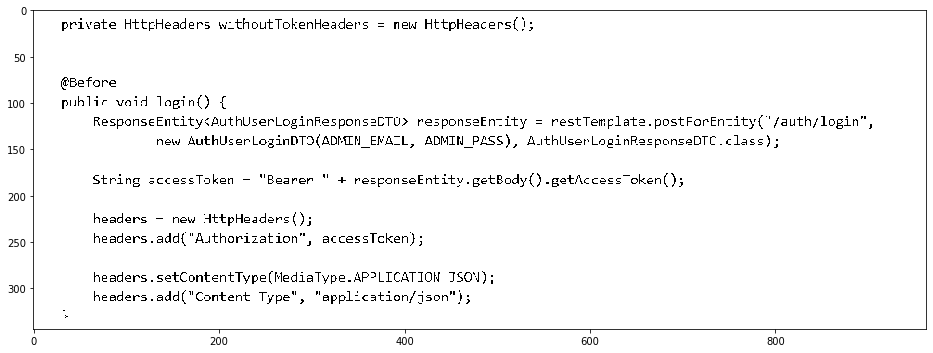

In [90]:
img_gray_threshold = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,31,51)
plt.imshow(img_gray_threshold, 'gray')

In [91]:
img_gray_threshold_rgb =  cv2.cvtColor(img_gray_threshold, cv2.COLOR_BGR2RGB)
text = get_text_with_indentation(img_gray_threshold_rgb, custom_config)
print(text)


   private HttpHeaders  withoutTokenHeaders = new HttpHeaders(); 

   @Before 
   public void  login() { 
       ResponseEntity<AuthUserLoginResponseDTO>   responseEntity = restTemplate. postForEntity("/auth/login", 
                new AuthUserLoginDTO(ADMIN_EMAIL,  ADMIN PASS), AuthUserLoginResponseDTO.class); 

       String  accessToken =  “Bearer " + responseEntity. getBody().getAccessToken(); 

        headers = new HttpHeaders(); 
        headers. add("Authorization", accessToken); 

        headers. setContentType(MediaType .APPLICATION_ISON) ; 
        headers. add("Content-Type", "application/json"); 

